## Importações e Informações do dataset

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregamento dos dados
file_path = '/content/drive/MyDrive/covid_data.csv'
data = pd.read_csv(file_path)

# Visualização dos dados
print("Primeiros registros do dataset:\n")
data.head()

Primeiros registros do dataset:



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Pré-processamento

In [2]:
# Tratamento de valores faltantes (se necessário)
data = data.dropna()

# Remoção de atributos qualitativos
quantitative_columns = data.select_dtypes(include=[np.number]).columns
data = data[quantitative_columns]

# Amostragem do dataset para evitar estouro de memória
data_sampled = data.sample(n=10000, random_state=42)  # Ajuste o valor conforme necessário

# Separação entre atributos (X) e rótulos (y)
X = data_sampled.drop(columns=['CLASIFFICATION_FINAL'])
y = data_sampled['CLASIFFICATION_FINAL']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Redução da dimensionalidade usando PCA
pca = PCA(n_components=0.95)  # Mantém 95% da variância explicada
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Gaussian Naive Bayes (padrão)


Matriz de Confusão:


[[  0   3   0  12   0   0   1]
 [  1   2   0   3   0   0   0]
 [  6 161   6 423   2   0  86]
 [  0   0   0   4   0   0   0]
 [  0  13   1  40   1   2  10]
 [  0  31   2 144   1  15  48]
 [ 20  95   6 736   3  12 110]]

Relatório de Classificação:


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.01      0.33      0.01         6
           3       0.40      0.01      0.02       684
           4       0.00      1.00      0.01         4
           5       0.14      0.01      0.03        67
           6       0.52      0.06      0.11       241
           7       0.43      0.11      0.18       982

    accuracy                           0.07      2000
   macro avg       0.21      0.22      0.05      2000
weighted avg       0.42      0.07      0.11      2000


Acurácia:
0.069


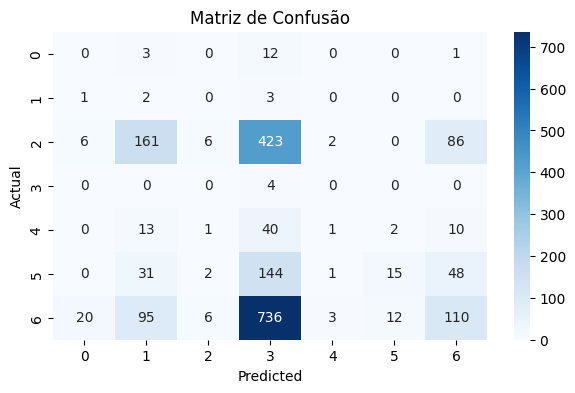

In [3]:
# Criação e treinamento do classificador Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:\n\n")
print(classification_report(y_test, y_pred))
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))

# Visualização da matriz de confusão
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()